In [55]:
import csv
import math
import sys
import numpy as np
import pandas as pd
import datetime

# plot
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [256]:
def init_data():
    #Reading users file:
    u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
    users = pd.read_csv('data/u.user', sep='|', names=u_cols,
     encoding='latin-1')

    #Reading ratings file:
    r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
    ratings = pd.read_csv('data/u.data', sep='\t', names=r_cols,
     encoding='latin-1')

    #Reading items file:
    i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
     'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
     'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    items = pd.read_csv('data/u.item', sep='|', names=i_cols,
     encoding='latin-1')
    # save to csv 
    users.to_csv('users.csv')
    ratings.to_csv('ratings.csv')
    items.to_csv('items.csv')
    
def load_train_test_data():
    r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
    ratings_base = pd.read_csv('data/ua.base', sep='\t', names=r_cols, encoding='latin-1')
    ratings_test = pd.read_csv('data/ua.test', sep='\t', names=r_cols, encoding='latin-1')
    ratings_base.to_csv('ratings_base.csv')
    ratings_test.to_csv('ratings_test.csv')

    
def load_data():
    users = pd.read_csv('users.csv')
    ratings =  pd.read_csv('ratings.csv')
    items =  pd.read_csv('items.csv')
    ratings_base = pd.read_csv('ratings_base.csv')
    ratings_test = pd.read_csv('ratings_test.csv')
    return users, ratings, items, ratings_base, ratings_test



#=============================================


def unix2datetime(x):
    temp = datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d')
    return temp

# need to fix 
def stringtime2datetime(x):
    temp = datetime.datetime.strptime(x, "%d-%b-%Y").strftime('%Y-%m-%d')
    #temp = pd.to_datetime(temp)
    return temp



In [18]:
load_train_test_data()

In [19]:
users, ratings, items, ratings_base, ratings_test = load_data()

In [43]:
ratings['datetime'] = ratings['unix_timestamp'].apply(lambda x :unix2datetime(x))
ratings_base['datetime'] = ratings_base['unix_timestamp'].apply(lambda x :unix2datetime(x))
ratings_test['datetime'] = ratings_test['unix_timestamp'].apply(lambda x :unix2datetime(x))

                                            

In [20]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_base = pd.read_csv('data/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('data/ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_base.shape, ratings_test.shape

((90570, 4), (9430, 4))

### 1) Variable overview

In [52]:
print  ('# of user :', len(set(ratings.user_id)))
print  ('# of movie :', len(set(ratings.movie_id)))
print  ('# of datetime :', len(set(ratings.datetime)))
print  ('time period : ',ratings.datetime.min(),'--', ratings.datetime.max() )

# of user : 943
# of movie : 1682
# of datetime : 214
time period :  1997-09-20 -- 1998-04-23


(0, 500)

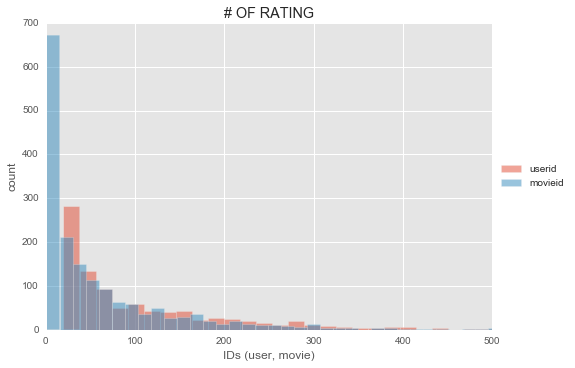

In [77]:
ratings.user_id.value_counts().hist(bins=40,alpha = .5)
plt.ylabel('count')
#plt.xlabel('user id ')
#plt.title('# users rate movie')


#=============================================


ratings.movie_id.value_counts().hist(bins=40,alpha = .5)
plt.ylabel('count')
plt.xlabel('IDs (user, movie)')
plt.title('# OF RATING')

plt.legend(['userid', 'movieid',], loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(0,500)

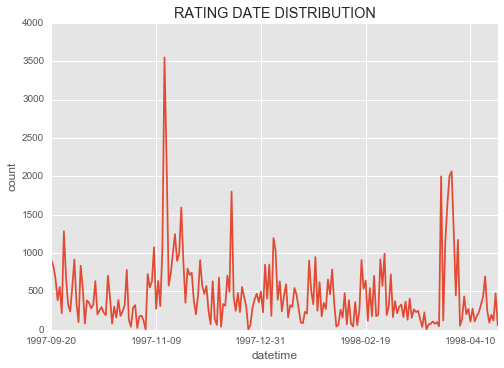

In [85]:
ratings.groupby('datetime').count()['unix_timestamp'].plot()

plt.ylabel('count')
plt.xlabel('datetime')
plt.title('RATING DATE DISTRIBUTION')

In [93]:
print  ('# of female user :', len(set(users[users.sex=='F'].user_id)))
print  ('# of male user :', len(set(users[users.sex=='M'].user_id)))
print  ('# of age :', len(set(users.age)))
print  ('# of occupation :', len(set(users.occupation)))
print  ('# of zip_code :', len(set(users.zip_code)))


# of female user : 273
# of male user : 670
# of age : 61
# of occupation : 21
# of zip_code : 795


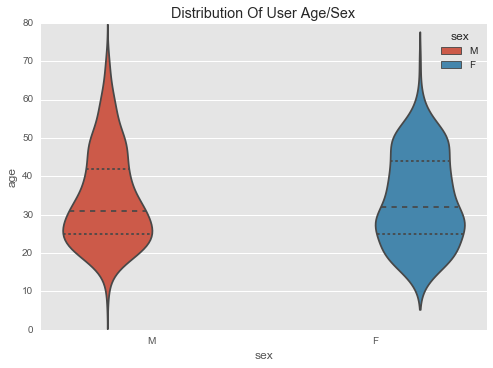

In [130]:
sns.violinplot(x="sex", y="age", data=users ,hue="sex",inner="quart")
plt.title('Distribution Of User Age/Sex')

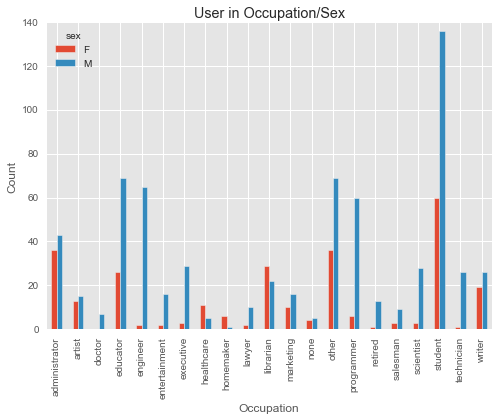

In [181]:
dfuserjob = users.groupby(['sex','occupation']).count()['user_id'].reset_index()
dfuserjobpivot = pd.pivot_table(dfuserjob,
                   columns='sex',
                   index='occupation',
                   values='user_id').fillna(0).reset_index()



dfuserjobpivot.set_index('occupation').plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.title('User in Occupation/Sex')


In [193]:
#users.groupby([''])

In [192]:
#users.zip_code.value_counts().plot()
#plt.ylabel('Count')
#plt.xlabel('zipcode')
#plt.title('Which Area User From')

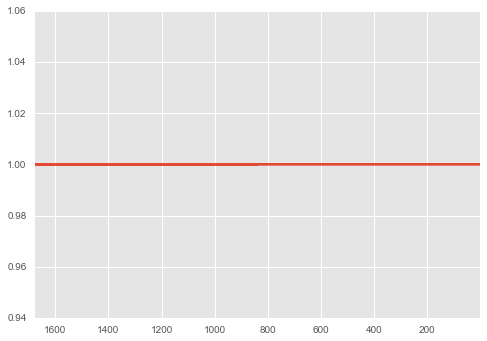

In [201]:
items['movie id'].value_counts().plot()

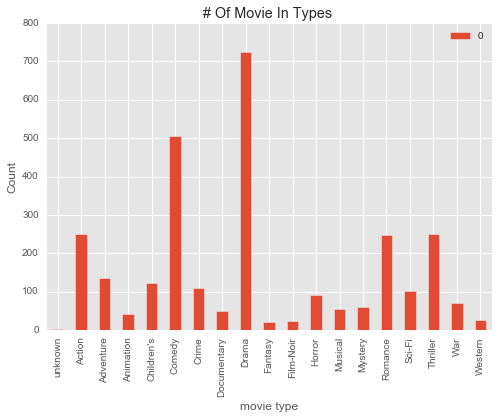

In [225]:
pd.DataFrame(items.sum()).T[movie_type].T.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('movie type')
plt.title('# Of Movie In Types ')

In [258]:
#s = "8 March, 2017"
#d = datetime.datetime.strptime(s, '%d %B, %Y')
#print(d.strftime('%Y-%m-%d'))

In [257]:
#items['release date'] = pd.to_datetime(items['release date'])
#items['datetime'] = items['release date'].apply(lambda x: stringtime2datetime(x))

In [248]:
s = "01-Jan-1995"
#print (datetime.datetime.strptime("01-Jan-1995", "%d-%b-%Y"))
print (datetime.datetime.strptime("01-Jan-1995", "%d-%b-%Y").strftime('%Y-%m-%d'))




1995-01-01


In [246]:
items.head(3)

,Unnamed: 0,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,datetime
0,0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,<function stringtime2datetime at 0x11ab26bf8>
1,1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,...,0,0,0,0,0,0,1,0,0,<function stringtime2datetime at 0x11ab26bf8>
2,2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<function stringtime2datetime at 0x11ab26bf8>
